


***Iris Flowers Classification ML Project :
Name-Shreya Junagade
Batch-AUG***




**Import module**


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, PowerTransformer
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.metrics import *

**Loading the dataset**

In [31]:
from google.colab import files
uploaded =files.upload()

Saving Iris.csv to Iris.csv


In [108]:
dataset=pd.read_csv("iris.data" ,names = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Class"])

In [247]:
print(dataset)

     Sepal Length  Sepal Width  Petal Length  Petal Width  Class
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2

[150 rows x 5 columns]


In [ ]:
dataset.head()


In [ ]:
dataset.tail()

In [ ]:
dataset.describe()

In [ ]:
for col in dataset.columns:
 print(col)


In [ ]:
dataset.info()

In [ ]:
dataset.Class.unique()

**Preprocessing the dataset**

In [ ]:
dataset.isnull()

In [255]:
x = dataset.drop(['Class'], axis = 1)
y = dataset['Class']


**Missing values**

In [ ]:
dataset.isnull().sum()

In [ ]:
dataset['Class'].value_counts()


***Coorelation Matrix ***





<Axes: >

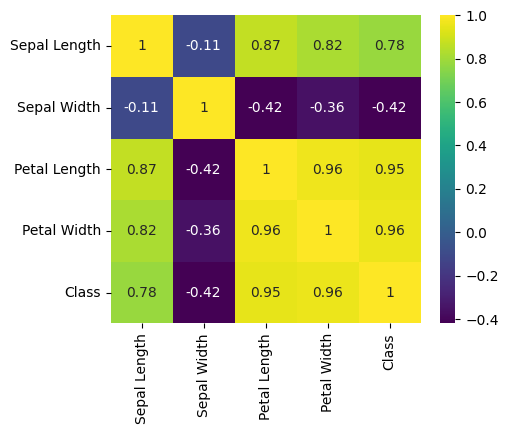

In [290]:
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'viridis')

In [ ]:
dataset.corr()

**Hierarchical/Agglomerative**

In [270]:
for metd in ['single', 'complete', 'average']:
    print('Linkage is', metd)
    for metr in ['euclidean', 'cityblock', 'cosine']:
        Z = linkage(x_std, method = metd, metric = metr)
        c, coph_dis = cophenet(Z, pdist(x_std))
        print(f'Cophenetic Distance Correlation Coefficient for {metr} metric is:', c)
    print()

Z = linkage(x_std, method = 'ward')
c, coph_dis = cophenet(Z, pdist(x_std))
print('Cophenetic Distance Correlation Coefficient for ward linkage is:', c)

Linkage is single
Cophenetic Distance Correlation Coefficient for euclidean metric is: 0.8280881760287518
Cophenetic Distance Correlation Coefficient for cityblock metric is: 0.8276185615632744
Cophenetic Distance Correlation Coefficient for cosine metric is: 0.7761026893332944

Linkage is complete
Cophenetic Distance Correlation Coefficient for euclidean metric is: 0.7512273718088645
Cophenetic Distance Correlation Coefficient for cityblock metric is: 0.7189034961616892
Cophenetic Distance Correlation Coefficient for cosine metric is: 0.6615593211884304

Linkage is average
Cophenetic Distance Correlation Coefficient for euclidean metric is: 0.8532224412681922
Cophenetic Distance Correlation Coefficient for cityblock metric is: 0.8393770547365786
Cophenetic Distance Correlation Coefficient for cosine metric is: 0.8057217690384747

Cophenetic Distance Correlation Coefficient for ward linkage is: 0.8225754331448963


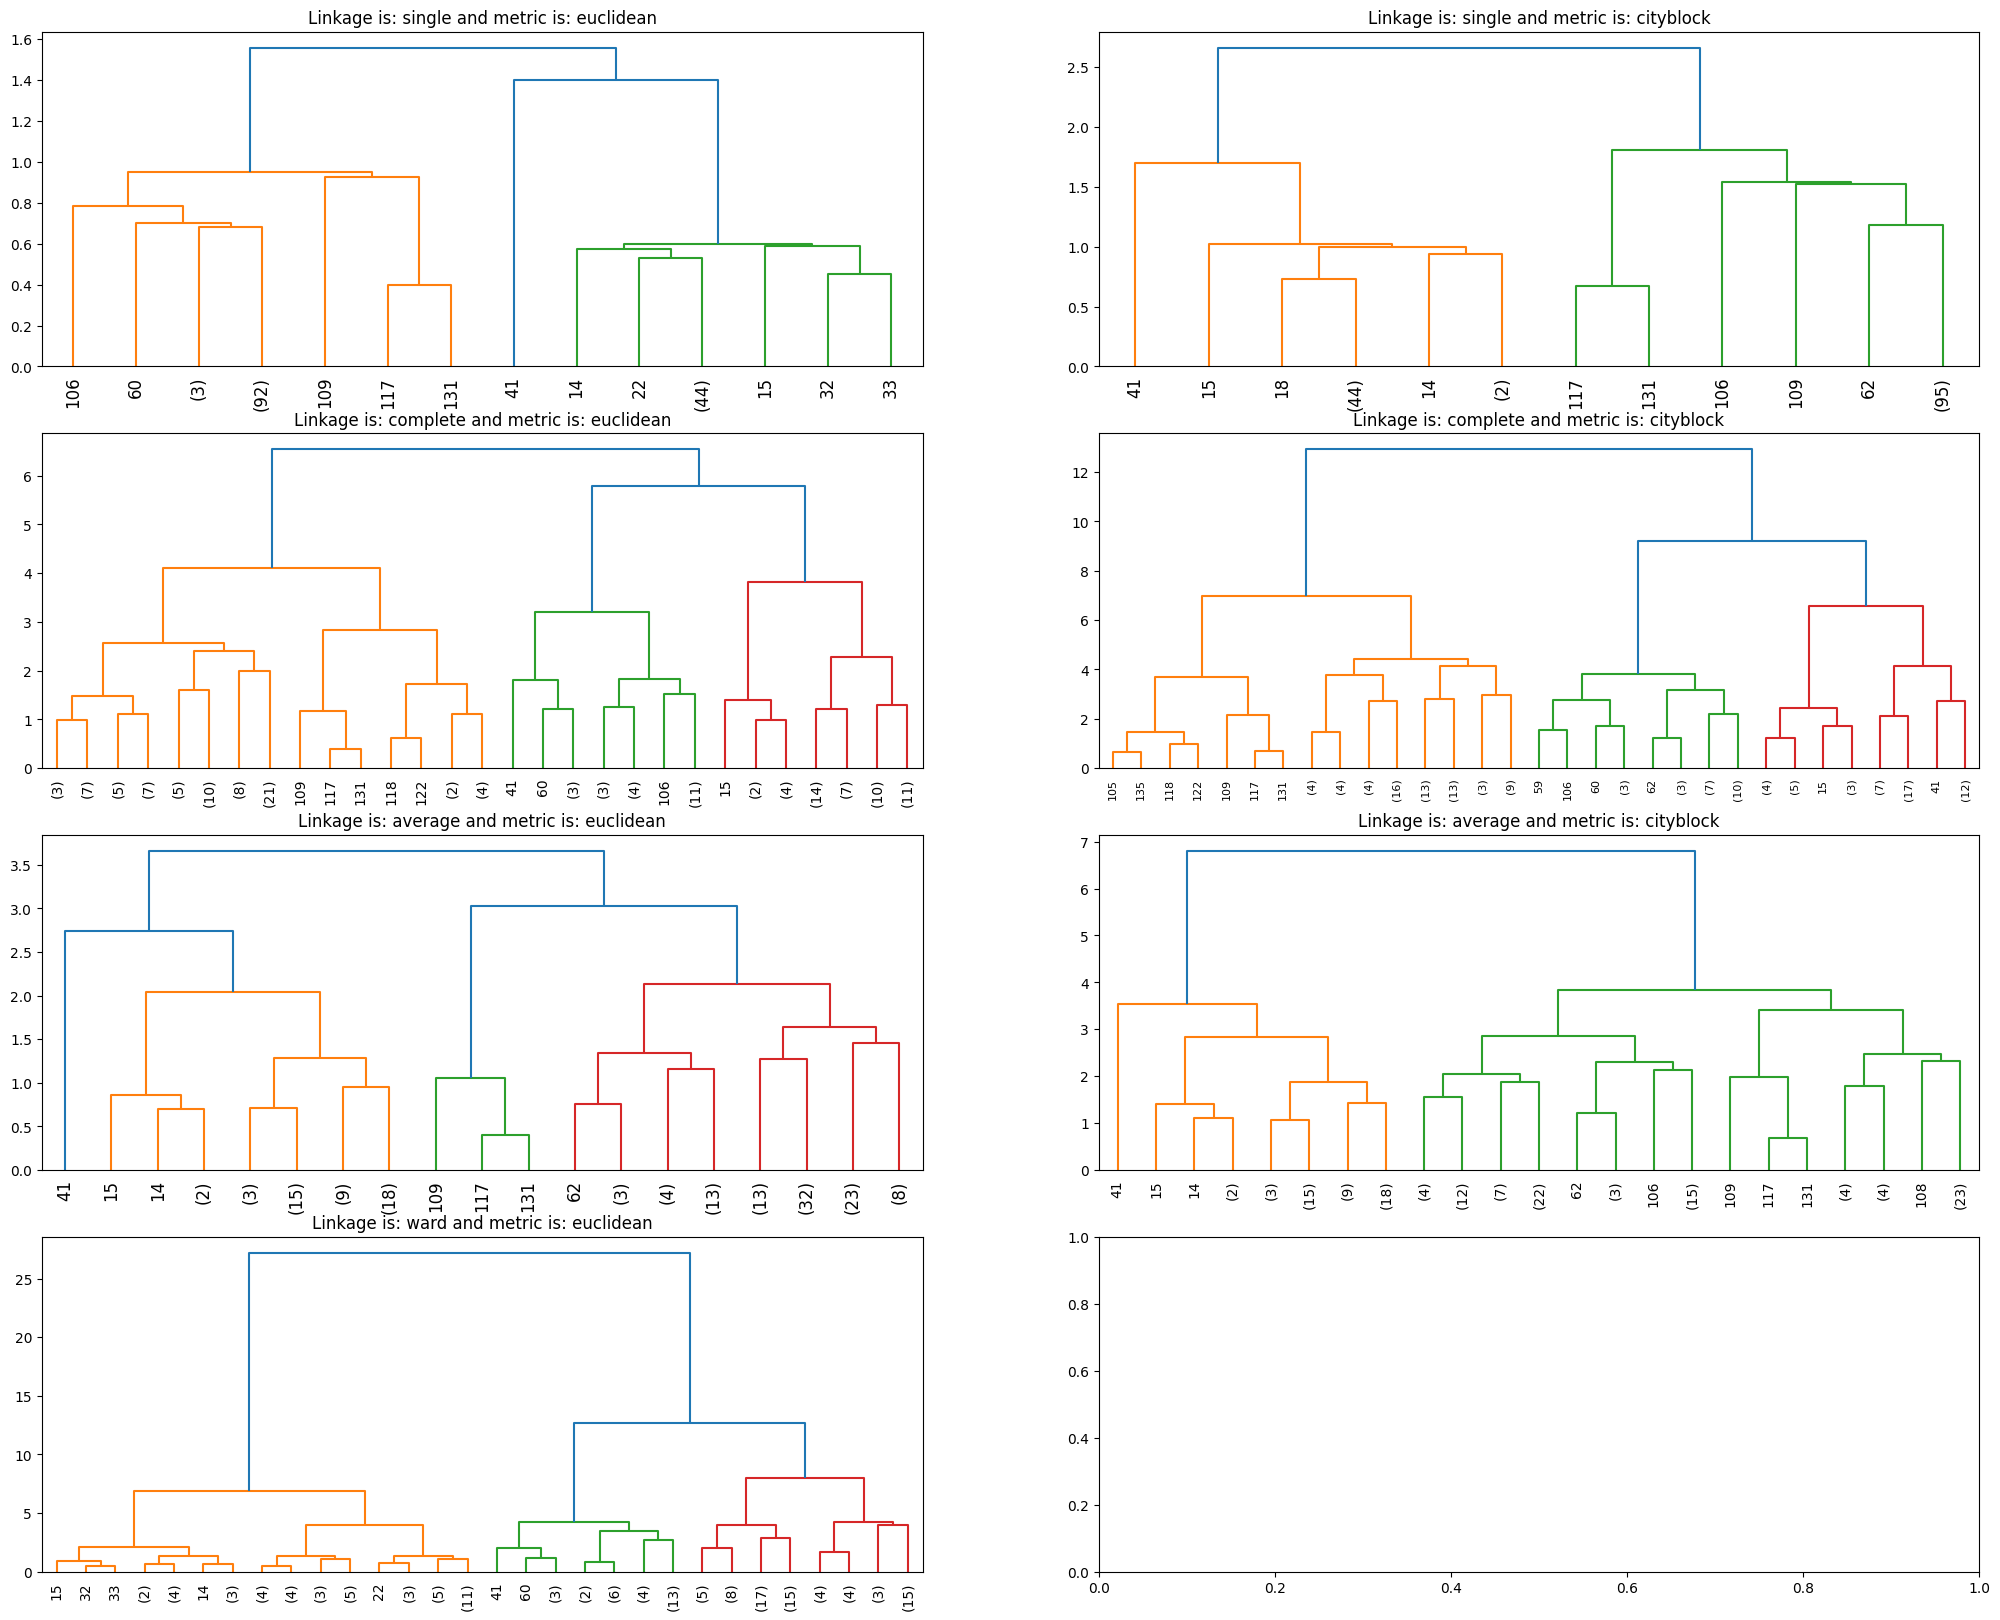

In [268]:
fig, axes = plt.subplots(4,2, figsize = (25,20))
axes = axes.flatten()
i = 0
for metd in ['single', 'complete', 'average']:
    for metr in ['euclidean', 'cityblock']:
        Z = linkage(x_std, method = metd, metric = metr)
        dendrogram(Z, leaf_rotation = 90, truncate_mode = 'level', p = 4, ax = axes[i])
        axes[i].set_title(f'Linkage is: {metd} and metric is: {metr}')
        i += 1

Z = linkage(x_std, method = 'ward')
dendrogram(Z, leaf_rotation = 90, truncate_mode = 'level', p = 4, ax = axes[i], color_threshold = 10)
axes[i].set_title('Linkage is: ward and metric is: euclidean')

plt.show()

In [262]:
y=dataset['Class']

#For Indenpendent feature we use 'X' variable
x=dataset.drop(['Class'],axis=1)

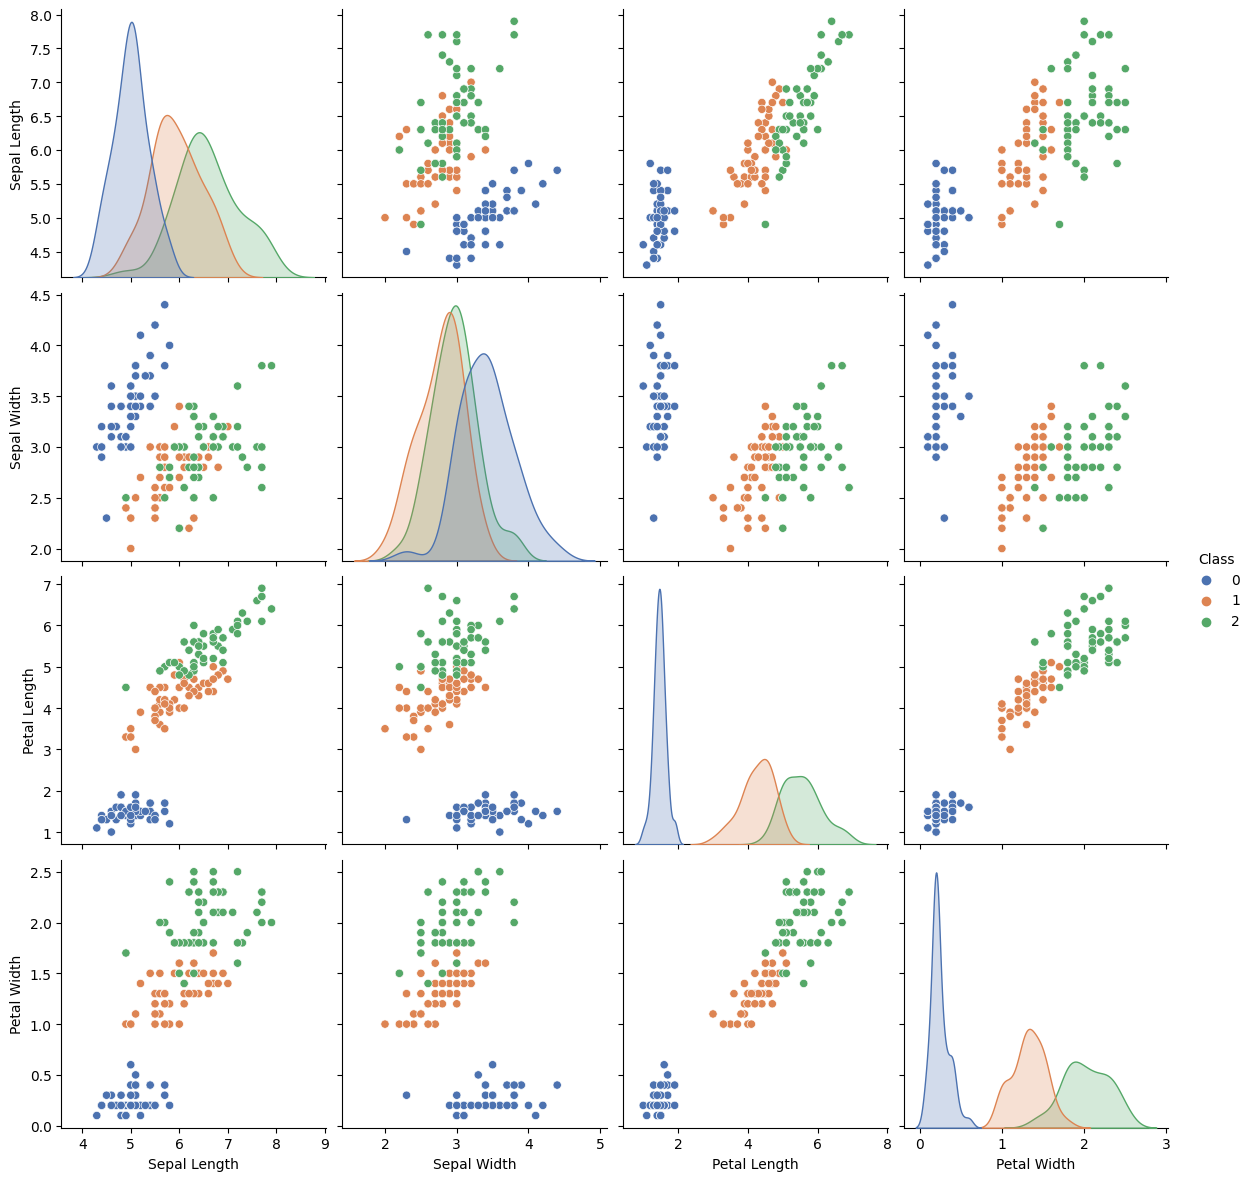

In [267]:
sns.pairplot(dataset,hue="Class",height=3,palette='deep')

**Histogram**

<Axes: >

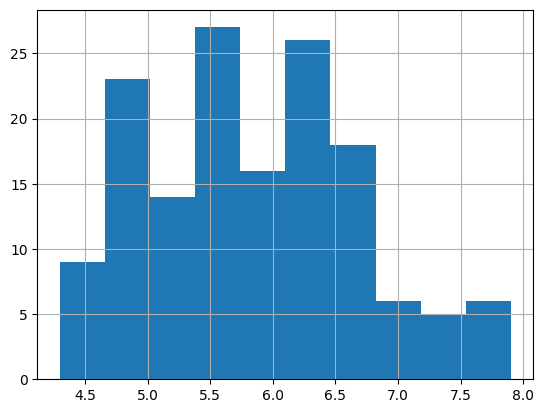

In [266]:
dataset['Sepal Length'].hist()

<Axes: >

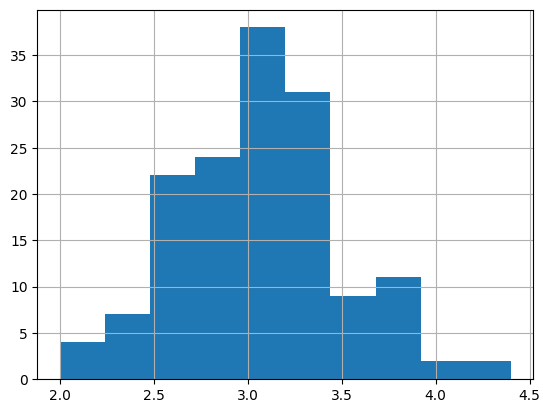

In [265]:
dataset['Sepal Width'].hist()

In [48]:
y=dataset['Class']

#For Indenpendent feature we use 'X' variable
x=dataset.drop(['Class'],axis=1)

In [ ]:
x

In [ ]:
y

**Label Encoder**

In [271]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
dataset['Class']= le.fit_transform(dataset['Class'])
dataset.head()

In [143]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

**Model Training**

In [276]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = dataset.drop(columns=['Class'])
Y = dataset['Class']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [277]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
sc

**PCA**

In [ ]:
pca  = PCA(n_components = 0.95)
X_pca = pd.DataFrame(pca.fit_transform(x_std))
X_pca.shape

**KMeans**

In [280]:
wcss = []
for i in range(1,10):
    km = KMeans(n_clusters = i, n_init = 15)
    km.fit(x_std)

    wcss.append(km.inertia_)

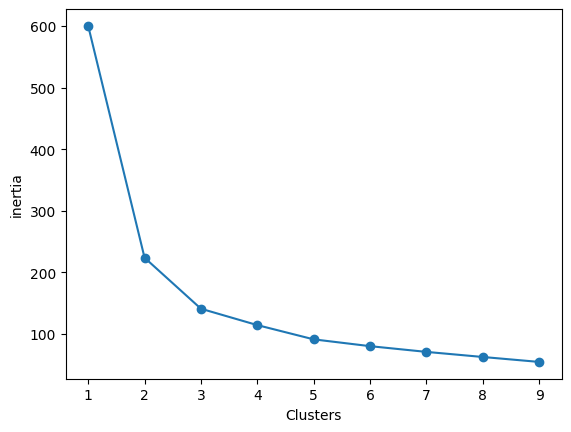

In [281]:
plt.plot(np.arange(1,10), wcss, marker = 'o')
plt.xlabel('Clusters')
plt.ylabel('inertia')
plt.show()

**Silhouette**

In [282]:
sil = []
for i in range(2,10):
    km = KMeans(n_clusters = i, n_init = 15)
    km.fit(x_std)

    sil.append(silhouette_score(x_std, km.labels_))

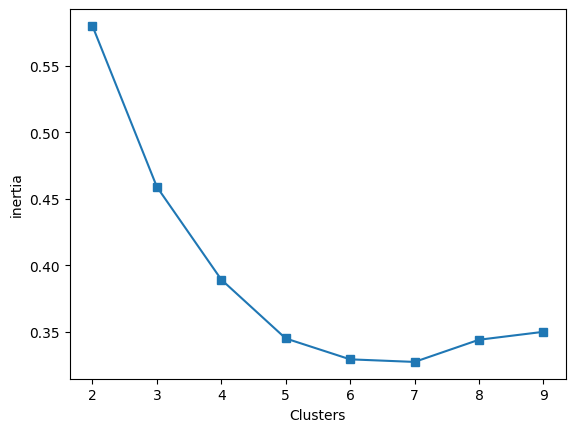

In [283]:
plt.plot(np.arange(2,10), sil, marker = 's')
plt.xlabel('Clusters')
plt.ylabel('inertia')
plt.show()

In [284]:
print('Inertia is :', km.inertia_)
print('Silhouette Score is :', silhouette_score(x_std, km.labels_))

Inertia is : 54.18109614503789
Silhouette Score is : 0.34977241107004137


In [285]:
g1 = dataset.groupby('Class')

In [ ]:
data_cen = g1[dataset.columns[1:5]].mean()
data_cen

**ScatterPlot**

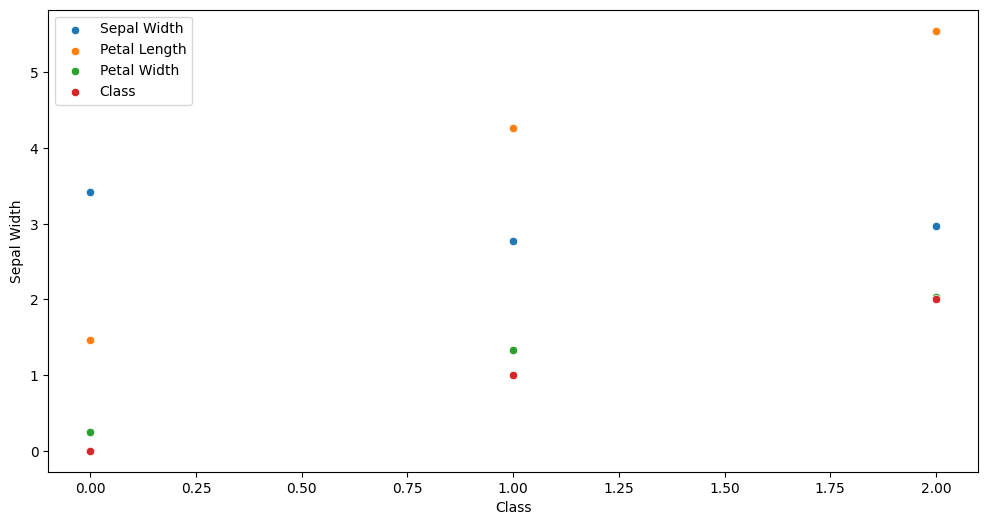

In [287]:

plt.figure(figsize = (12,6))
for i in data_cen.columns:
    sns.scatterplot(x = data_cen.index, y = data_cen[i], label = i)
plt.legend()
plt.show()

In [ ]:
label = pd.Series(km.labels_)
label.value_counts()

***Logistic Regression ***

In [291]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [292]:
lr = LogisticRegression(random_state=0, multi_class="ovr")

In [293]:
lr.fit(x_std, y)

LogisticRegression(multi_class='ovr', random_state=0)

In [294]:
y_pred = lr.predict(x_std)

In [310]:
y=dataset['Class']

#For Indenpendent feature we use 'X' variable


**Training Model**

In [323]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = dataset.drop(columns=['Class'])
Y = dataset['Class']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [322]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [ ]:
x.shape,y.shape

**RandomForestClassifier()**

In [307]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier()

In [313]:
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
classifier.feature_importances_

In [ ]:
for feature, index in zip(x, range(4)):
    print(feature,':',classifier.feature_importances_[index])

In [316]:
y_pred=classifier.predict(x_test)

In [ ]:

y_pred

In [ ]:
y_actual=np.array(y_test)
y_actual

**confusion Matrix**

In [319]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_actual,y_pred)

array([[20,  0,  0],
       [ 0,  8,  2],
       [ 0,  1, 14]])

In [320]:
print(classification_report(y_actual,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.89      0.80      0.84        10
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.92      0.91      0.92        45
weighted avg       0.93      0.93      0.93        45



**K Neighbour Classifier**

In [245]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [ ]:
model.fit(x_train, y_train)

**DecisionTreeClassifier**

In [230]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [ ]:
model.fit(x_train, y_train)

**Accuracy**

In [321]:
print("Accuracy: ",classifier.score(x_test, y_test) * 100)


Accuracy:  93.33333333333333
